<a href="https://colab.research.google.com/github/DesireeHc/EcuacionesDiferenciales/blob/main/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de ecuaciones diferenciales

Esta notebook muestra la manera de resolver sistemas de ecuaciones diferenciales en python con matrices.
Para la primera parte hemos desarrollado las soluciones de **sistemas de ecuaciones diferenciales lineales**, y consta de la definición del sistema y de la matriz para este tipo de ecuaciones, se define la gráfica, se obtiene el discriminate a través de la traza y el determinante que están definidos en la librería ***  y finalmente se obtiene la clasificación del sistema y la región en la que se encuentra de acuerdo a los puntos degenerados.   

La segunda parte muiestra los resultados para el caso de sistemas de ecuaciones diferenciales lineales no homogéneos.

Y para la tercera parte tenemos los sistemas de ecuaciones diferenciales no lineales.

In [3]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [4]:
a,b,c,d=1, 1, -1, 2
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos

In [5]:
 A=sym.Matrix([[a,b],[c,d]]) #definimos a la matriz

In [6]:
# Trayectorias.
#Definimos a las graficas como una función
def grafica(dx_dt):
    ts = np.linspace(0,-4,100) #se crea un arreglo de 100 "puntos de tiempo" igualmente espaciados entre el 0 y el -4
    ic = np.linspace(-1,1,5) #crea un arreglo de 5 valores iniciales entre el -1 y el 1, crea una malla de condiciones iniciales de las dos variables iniciales
    for r in ic: #r=-1
        for s in ic: #s=1
            x0 = [r, s] #crea los valores iniciales de ambas variables
            xs = odeint(dx_dt, x0, ts) #odeint resuelve el sistema con la condición inicial x0  para los puntos de ts
            plt.plot(xs[:,0], xs[:,1], "r-") #grafica la trayectoria de la solución


    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.tick_params(labelsize=8) #dan los nombres de la gráfica y el tamaño
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)#los limites para graficar

    X,Y = np.mgrid[-1:1:10j, -1:1:10j] #crea dos mallas de puntos que van de -1 a 1, y contiene 10 flechas
    u = a*X + b*Y #calcula las componentes en x del campo vectorial en cada punto de la malla
    v = c*X + d*Y
    pl.quiver(X, Y, u, v, color = 'b') #grafica el campo vectorial
    plt.show() #muestra la gráfica

In [7]:
def D(A):
    return A.trace()**2-4*A.det()  #Definimos al discriminante

In [8]:
def tipo(A):
    t=A.trace()
    d=A.det()
    grafica(dx_dt)
    if t>0 and d>0 and D(A)>0:
        print("El punto fijo pertence a la Región I")
    elif t>0 and d>0 and D(A)<0:
        print("El punto fijo pertence a la Región II")
   # elif t<0 and d>0 and D(A)<0:
    #    print("El punto fijo pertence a la Región III")
    #elif t<0 and d>0 and D(A)>0:
     #   print("El punto fijo pertence a la Región IV")
    elif d<0:
        print("El punto fijo pertence a la Región V")
    elif D(A)==0:
        print("El punto fijo es degenerado")

In [9]:
def clas(A):
    t=A.trace()
    d=A.det()
    if t<0 and d>0:
      if D(A)<0:
        print("El punto fijo pertenece a la región III, es estable y atractivo")
      if D(A)>0:
        print("El punto fijo pertenece a la región IV, es estable y atractivo")
    elif t<=0 and d>0:
        print("El punto fijo es estable")
    elif t>0 and d<0:
        print("El punto fijo es inestable")
    else:
        print("No  tiene clasificación")

3
3
-3


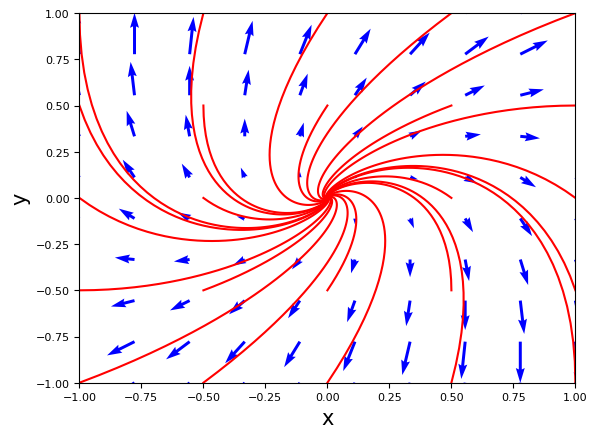

El punto fijo pertence a la Región II
No  tiene clasificación


(None, None)

In [10]:
print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)


Ejemplos para cada región:

In [11]:
#Región I
a,b,c,d=2, 1, 1, 2
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [12]:
print(A.det())
print(A.trace())
print(D(A))

3
4
4


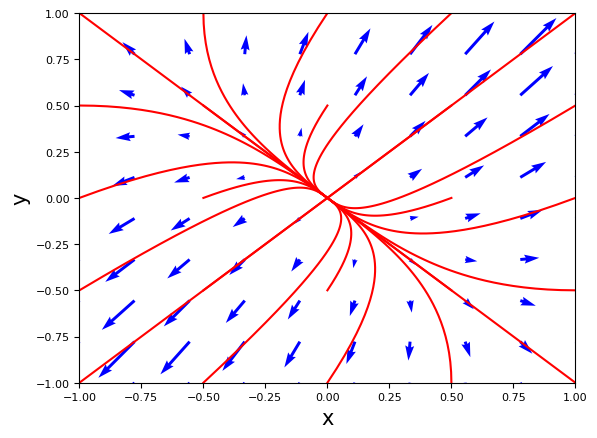

El punto fijo pertence a la Región I
No  tiene clasificación


(None, None)

In [13]:
tipo(A), clas(A)

In [14]:
#Región II
a,b,c,d= 1, -1, 1, 1
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [15]:
print(A.det())
print(A.trace())
print(D(A))

2
2
-4


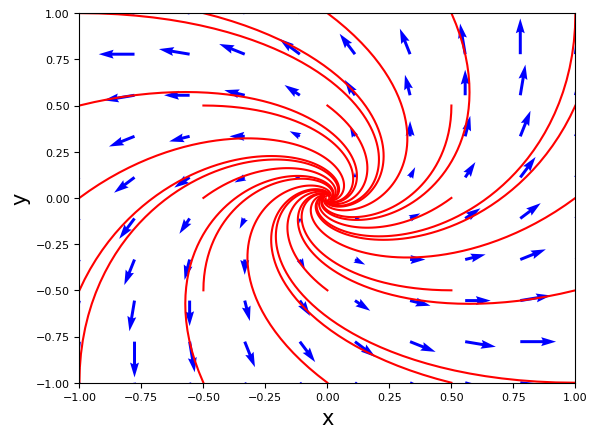

El punto fijo pertence a la Región II
No  tiene clasificación


(None, None)

In [16]:
tipo(A), clas(A)

In [17]:
#Región III
a,b,c,d= -1, -2, 1, -1
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

In [18]:
print(A.det())
print(A.trace())
print(D(A))

3
-2
-8


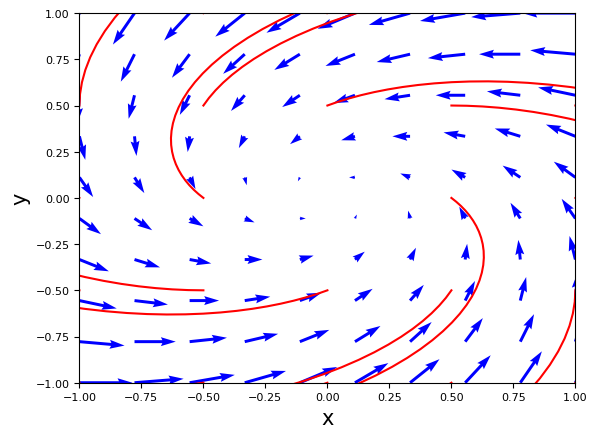

El punto fijo pertenece a la región III, es estable y atractivo


(None, None)

In [19]:
tipo(A), clas(A)

8
-6
4


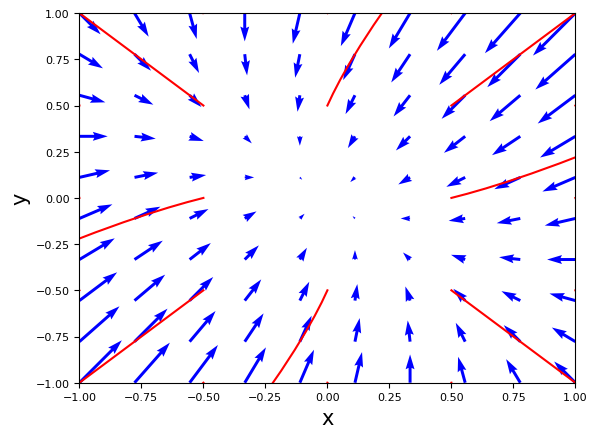

El punto fijo pertenece a la región IV, es estable y atractivo


(None, None)

In [20]:
#Región IV
a,b,c,d=-3, -1, -1, -3
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)

-10
1
41


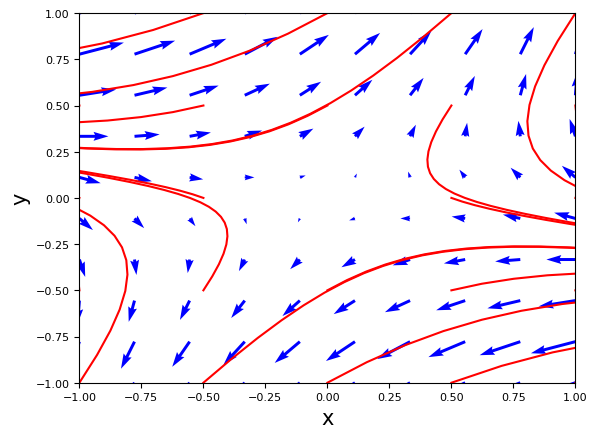

El punto fijo pertence a la Región V
El punto fijo es inestable


(None, None)

In [21]:
#Región V
a,b,c,d= -2, 4, 1, 3
 #definimos el sistema de ecuaciones
def dx_dt(x,t):
    return [a*x[0]+b*x[1],c*x[0]+d*x[1]] #lista que contiene dos elementos
A=sym.Matrix([[a,b],[c,d]])

print(A.det())
print(A.trace())
print(D(A))

tipo(A), clas(A)

#Sistemas de ecuaciones diferenciales lineales y no homogéneas

Consideramos ahora un sistema de la forma $$X \Dot = AX+B $$\
donde B es un vector fijo en $\mathbf{R^n}$
En esta sección resolveremos los sistemas de ecuaciones no homogéneos así como podremos visualizar sus gráficas solución.

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [44]:
# Definimos el sistema de ecuaciones diferenciales
def s_ec(y, t, A, B, C):
    # y es el vector de estado [y1, y2, ..., yn]
    # t es el tiempo
    # A es la matriz de coeficientes de las ecuaciones homogéneas
    # B es la matriz de coeficientes de la parte no homogénea
    # C es el vector no homogéneo
    return np.dot(A, y) + B * np.sin(C * t)

# Definimos las matrices y vectores
A = np.array([[1, 12], [3, 1]])  # Matriz de coeficientes homogéneos
B = np.array([-25, -5])                # Matriz de coeficientes no homogéneos
C = np.array([-25, -5])                # Vector no homogéneo (frecuencia)

# Condiciones iniciales
y0 = [1, 0]  # y(0) = 1, y'(0) = 0

# Intervalo de tiempo
t = np.linspace(0, 10, 1000)


In [45]:
# Resolver el sistema de ecuaciones diferenciales
sol = odeint(sistema_ecuaciones, y0, t, args=(A, B, C))


¿cómo encontrar la solucion general?

In [50]:
xs = odeint(dx_dt, x0, t)  # Solve the system
print(sol)

[[1.00000000e+00 0.00000000e+00]
 [1.04319636e+00 3.19212717e-02]
 [1.15163459e+00 6.89707114e-02]
 ...
 [2.84571724e+30 1.42285862e+30]
 [3.05226888e+30 1.52613444e+30]
 [3.27381274e+30 1.63690637e+30]]


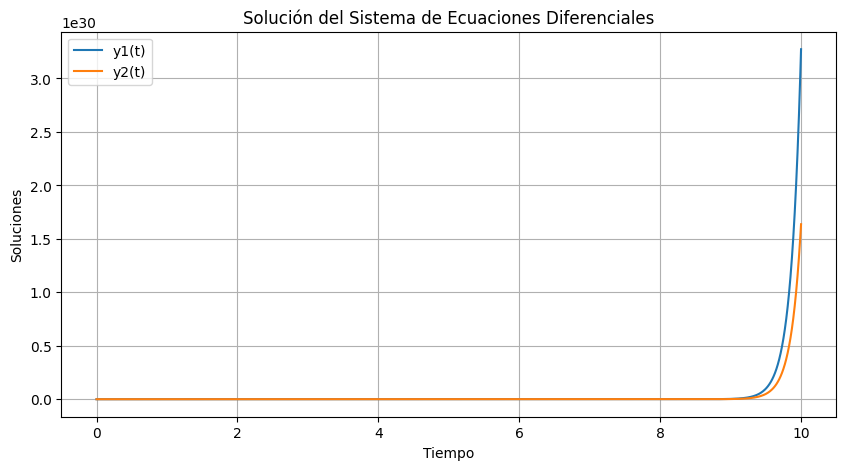

In [47]:
# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 0], label='y1(t)')
plt.plot(t, sol[:, 1], label='y2(t)')
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.title('Solución del Sistema de Ecuaciones Diferenciales')
plt.grid(True)
plt.show()

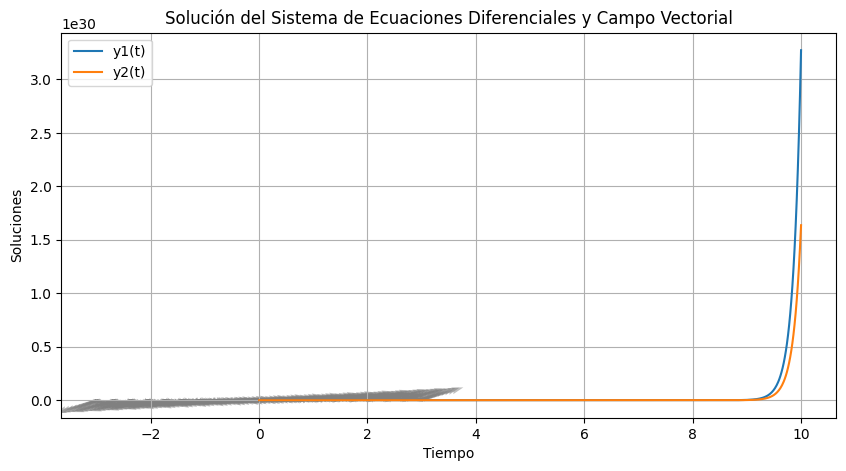

In [48]:
# Crear una cuadrícula de puntos
Y1, Y2 = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
U = np.zeros(Y1.shape)
V = np.zeros(Y2.shape)
t0 = 0  # tiempo inicial para evaluar el campo vectorial

# Evaluar el campo vectorial en cada punto de la cuadrícula
for i in range(Y1.shape[0]):
    for j in range(Y1.shape[1]):
        y_prime = sistema_ecuaciones([Y1[i, j], Y2[i, j]], t0, A, B, C)
        U[i, j] = y_prime[0]
        V[i, j] = y_prime[1]

# Graficar los resultados
plt.figure(figsize=(10, 5))

# Graficar las soluciones
plt.plot(t, sol[:, 0], label='y1(t)')
plt.plot(t, sol[:, 1], label='y2(t)')

# Graficar el campo vectorial
plt.quiver(Y1, Y2, U, V, color='gray', alpha=0.5)

# Configurar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.title('Solución del Sistema de Ecuaciones Diferenciales y Campo Vectorial')
plt.grid(True)
plt.show()

#Sistemas de ecuaciones diferenciales no lineales

En esta sección trabajaremos con Sistemas de ecuaciones diferenciales no lineales

In [40]:
# The 2-dimensional nonlinear system.
def dx_dt(x, t):
    return [x[1], x[0] * (1 - x[0]**2) + x[1]]

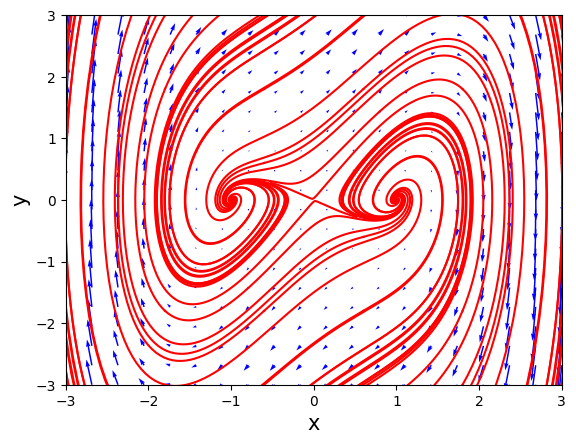

In [43]:
# Trajectories in forward time.
ts = np.linspace(0, 10, 500)
ic = np.linspace(-3, 3, 6)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
# Trajectories in backward time.
ts = np.linspace(0, -10, 500)
ic = np.linspace(-3, 3, 6)
for r in ic:
    for s in ic:
        x0 = [r, s]
        xs = odeint(dx_dt, x0, ts)
        plt.plot(xs[:,0], xs[:,1], "r-")
# Label the axes and set fontsizes.
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.tick_params(labelsize=10)
plt.xlim(-3, 3)
plt.ylim(-3, 3);
# Plot the vectorfield.
X, Y = np.mgrid[-3:3:20j, -3:3:20j]
u=Y
v=X * (1 - X**2) + Y
pl.quiver(X, Y, u, v, color = 'b')
plt.show()